In [23]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [24]:
import numpy as np
import pandas as pd
import datetime as dt

In [48]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [28]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [29]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [30]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [31]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [32]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [ ]:
# EXPLORATORY CLIMATE ANALYSIS

In [50]:
# Find the names and types of the columns on the measurement table 
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [51]:
# Find the names and types of the columns on the station table 
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [67]:
# Calculate the date 1 year ago from the last data point in the database
last_date =session.query(measurement.date).order_by(measurement.date.desc()).first()
print("Last date available:", last_date)

date = dt.date(2017, 8, 23) - dt.timedelta(days = 365)
print("Date 1 year ago: ", date)

Last date available: ('2017-08-23',)
Date 1 year ago:  2016-08-23


In [68]:
# Perform a query to retrieve the date and precipitation scores for the last year
precipitation_data = session.query(measurement.prcp , measurement.date).\
    filter(measurement.date > '2016-08-23').\
    order_by(measurement.date).all()
precipitation_data

[(0.08, '2016-08-24'),
 (2.15, '2016-08-24'),
 (2.28, '2016-08-24'),
 (None, '2016-08-24'),
 (1.22, '2016-08-24'),
 (2.15, '2016-08-24'),
 (1.45, '2016-08-24'),
 (0.08, '2016-08-25'),
 (0.08, '2016-08-25'),
 (0.0, '2016-08-25'),
 (0.0, '2016-08-25'),
 (0.21, '2016-08-25'),
 (0.06, '2016-08-25'),
 (0.11, '2016-08-25'),
 (0.0, '2016-08-26'),
 (0.03, '2016-08-26'),
 (0.02, '2016-08-26'),
 (0.04, '2016-08-26'),
 (0.0, '2016-08-26'),
 (0.01, '2016-08-26'),
 (0.0, '2016-08-27'),
 (0.18, '2016-08-27'),
 (0.02, '2016-08-27'),
 (0.0, '2016-08-27'),
 (0.12, '2016-08-27'),
 (None, '2016-08-27'),
 (0.01, '2016-08-28'),
 (0.14, '2016-08-28'),
 (0.14, '2016-08-28'),
 (0.14, '2016-08-28'),
 (0.6, '2016-08-28'),
 (2.07, '2016-08-28'),
 (0.0, '2016-08-29'),
 (0.17, '2016-08-29'),
 (0.04, '2016-08-29'),
 (None, '2016-08-29'),
 (0.0, '2016-08-29'),
 (0.35, '2016-08-29'),
 (0.9, '2016-08-29'),
 (0.0, '2016-08-30'),
 (0.0, '2016-08-30'),
 (0.02, '2016-08-30'),
 (0.0, '2016-08-30'),
 (0.0, '2016-08-30'),
 (

In [78]:
# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_df = pd.DataFrame(precipitation_data, columns = ['Precipitation', 'Date'])
precipitation_df.set_index('Date')
precipitation_df.head(5)

,Precipitation,Date
0,0.08,2016-08-24
1,2.15,2016-08-24
2,2.28,2016-08-24
3,NaN,2016-08-24
4,1.22,2016-08-24


In [76]:
# Sort the dataframe by date
p_date = precipitation_df.sort_values(by = 'Date')

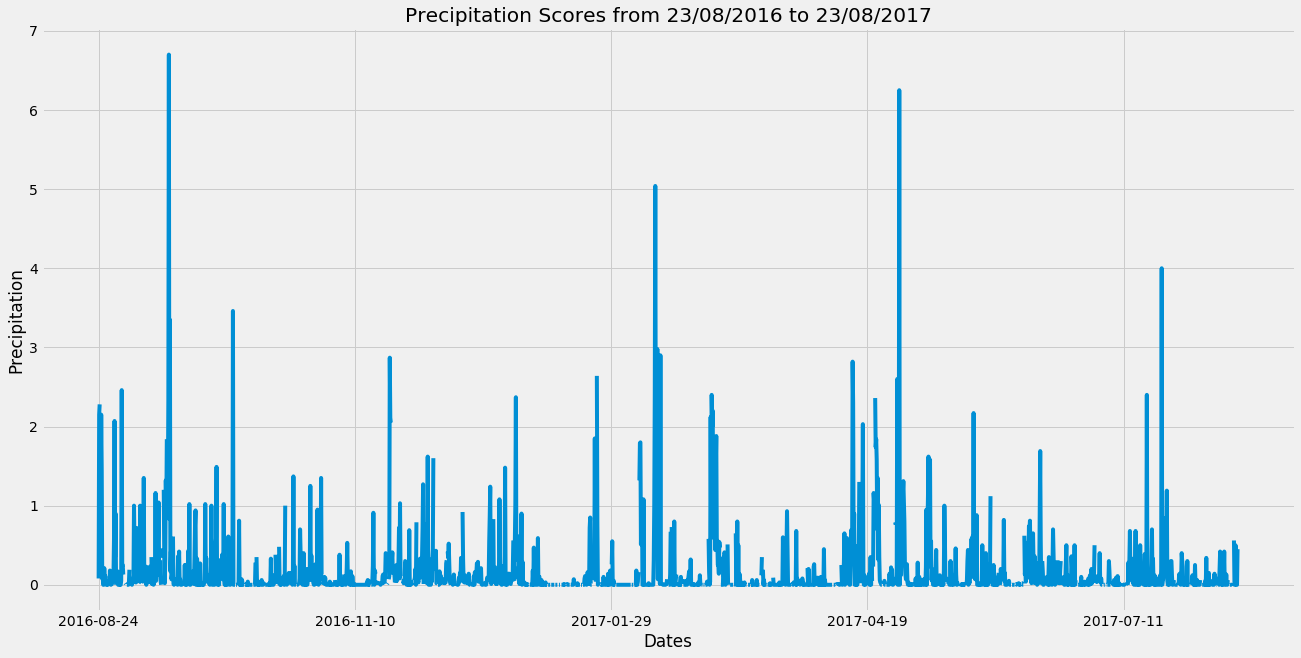

In [90]:
# Use Pandas Plotting with Matplotlib to plot the data
p_date.plot(x="Date", figsize =(20,10), legend=False)
plt.title("Precipitation Scores from 23/08/2016 to 23/08/2017")
plt.ylabel("Precipitation")
plt.xlabel("Dates")
plt.show()

In [91]:
# Use Pandas to calculate the summary statistics for the precipitation data
p_date.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [134]:
# Design a query to show how many stations are available in this dataset
stations = session.query(func.count(station.name)).all()
print("There are:",(stations), "stations")

There are: [(9,)] stations


In [101]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_count = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).\
               order_by(func.count(measurement.station).desc()).all()
print("The most active stations are:")
station_count

The most active stations are:


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [111]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
temps = session.query(func.min(measurement.tobs), func.max(measurement.tobs),\
                      func.avg(measurement.tobs)).\
                      filter(measurement.station == 'USC00519281').all()
print("Lowest temperature, highest temperature and average temperature records for USC00519281")
print(temps)

Lowest temperature, highest temperature and average temperature records for USC00519281
[(54.0, 85.0, 71.66378066378067)]


In [124]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_mostActive = session.query(measurement.date).filter(measurement.station == 'USC00519281').\
          order_by(measurement.date.desc()).first()
yearAgo_mostActive = dt.date(2017, 8, 18) - dt.timedelta(days = 365)
print("Start date:", yearAgo_mostActive)
print("End date", last_mostActive)

Start date: 2016-08-18
End date ('2017-08-18',)


In [129]:
temp_mostActive =  session.query(measurement.tobs, measurement.date).\
                          filter(measurement.station == 'USC00519281' ).\
                          filter(measurement.date >= '2016,8,18').all()
temp_df = pd.DataFrame(temp_mostActive)
temp_df.head(5)

,tobs,date
0,74.0,2016-01-01
1,72.0,2016-01-02
2,68.0,2016-01-03
3,69.0,2016-01-04
4,70.0,2016-01-05


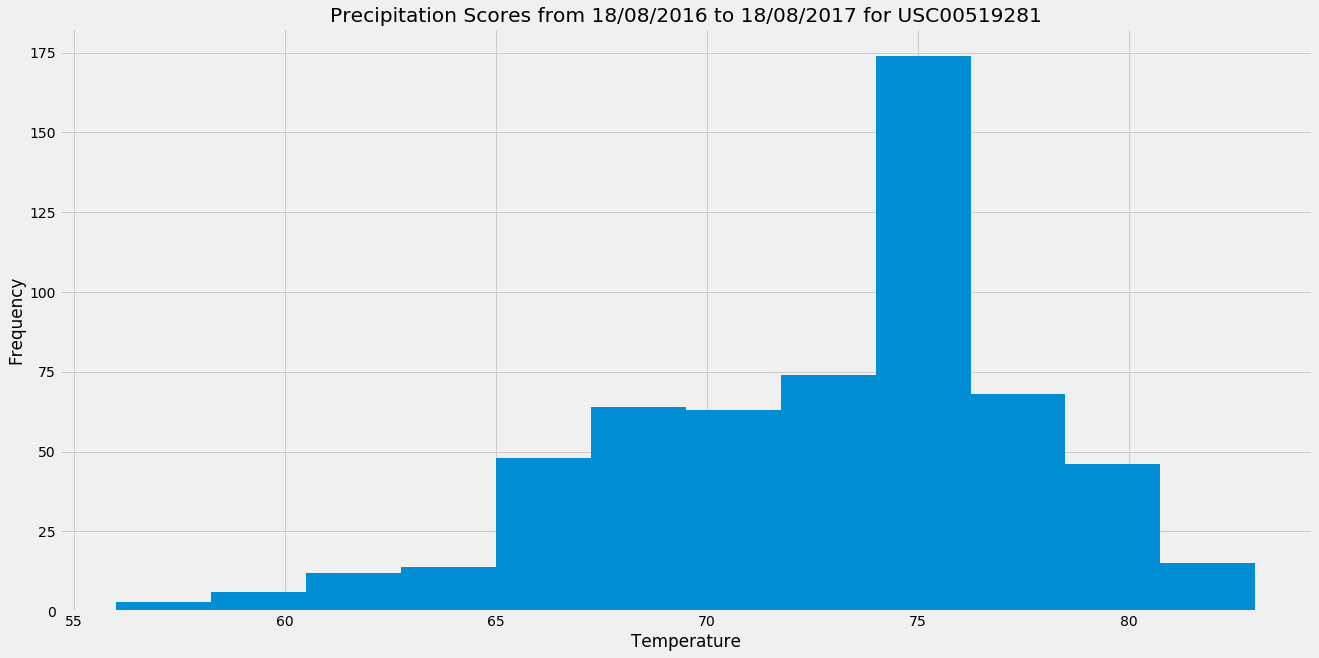

In [136]:
# Use Pandas Plotting with Matplotlib to plot the data
temp_df.plot.hist(x="date", figsize =(20,10), legend=False, bins=12)
plt.title("Precipitation Scores from 18/08/2016 to 18/08/2017 for USC00519281")
plt.ylabel("Frequency")
plt.xlabel("Temperature")
plt.show()